### Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings
from pingouin import qqplot

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset\User_Data.csv")
df.drop("User ID", axis=1, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Dataset Understanding

In [3]:
df.ndim

2

In [4]:
df.shape

(400, 4)

In [5]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.isnull().any()

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [10]:
df.notna().sum()

Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

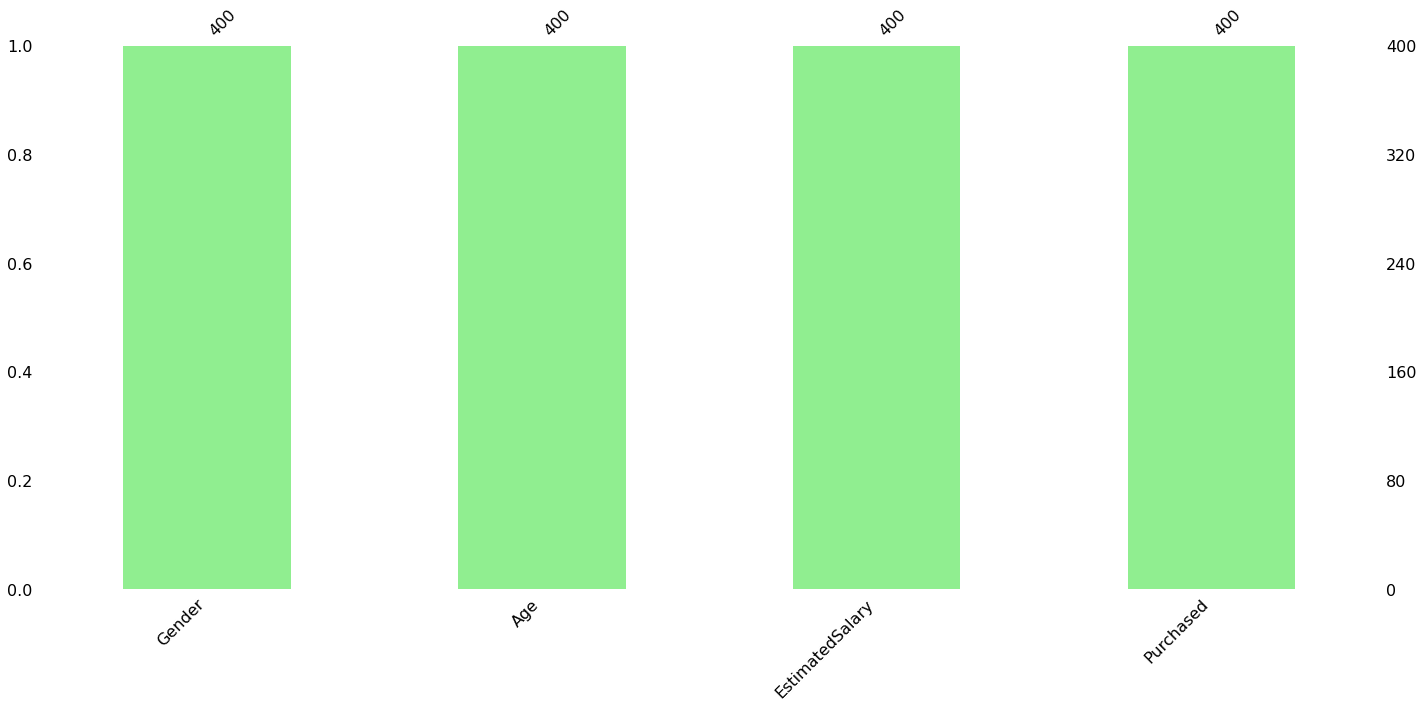

In [11]:
import missingno as msno

msno.bar(df, color="lightgreen")
plt.show()

In [12]:
df.Purchased.map({0: "Not Purchased", 1: "Purchased"})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [13]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [14]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
df.groupby("Gender").mean()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,38.411765,71759.803922,0.377451
Male,36.867347,67642.857143,0.336735


In [16]:
df.groupby("Gender").var()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,117.918285,1.267021e+09,0.236139
Male,100.874621,1.051174e+09,0.224490


In [17]:
df.groupby("Gender").std()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,10.859019,35595.236189,0.485942
Male,10.043636,32421.819181,0.473804


In [18]:
df.groupby("Purchased").mean()

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


In [19]:
df.groupby("Purchased").var()

,Age,EstimatedSalary
Purchased,,
0,63.773711,5.929990e+08
1,74.169507,1.769397e+09


In [20]:
df.groupby("Purchased").std()

,Age,EstimatedSalary
Purchased,,
0,7.985844,24351.570102
1,8.612172,42064.200064


In [21]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Data Visualization

In [22]:
def plot_numerical(var):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    sns.histplot(x=df[var], ax=axes[0][0], kde=True, bins=20)
    qqplot(df[var], dist="norm", ax=axes[0][1])
    sns.stripplot(x=df.Purchased, y=df[var], ax=axes[1][0], palette="husl")
    sns.barplot(x=df.Purchased, y=df[var], ax=axes[1][1], palette="Paired")
    plt.suptitle(var.title())
    plt.show()

In [23]:
def plot_kde(var):
    facet = sns.FacetGrid(df, hue="Purchased", aspect=4, palette="tab10")
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    plt.title(var.title())
    plt.show()

In [24]:
def plot_categorial(var):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    df[var].value_counts().plot.pie(
        autopct="%.0f%%",
        labels=df[var].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0][0],
    )

    df[var].value_counts().plot.barh(ax=ax[0][1])
    sns.scatterplot(
        x=df.Age, y=df.EstimatedSalary, hue=df[var], ax=ax[1][0], palette="husl"
    )
    sns.stripplot(
        x=df[var], y=df.EstimatedSalary, hue=df.Purchased, ax=ax[1][1], palette="Paired"
    )
    fig.suptitle("Count of " + var.title())
    plt.show()

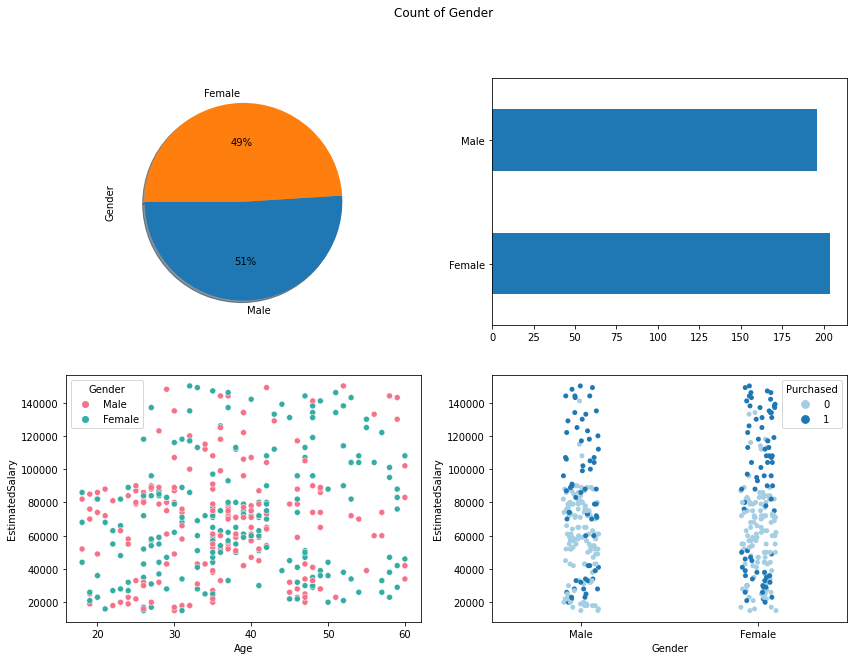

In [25]:
plot_categorial("Gender")

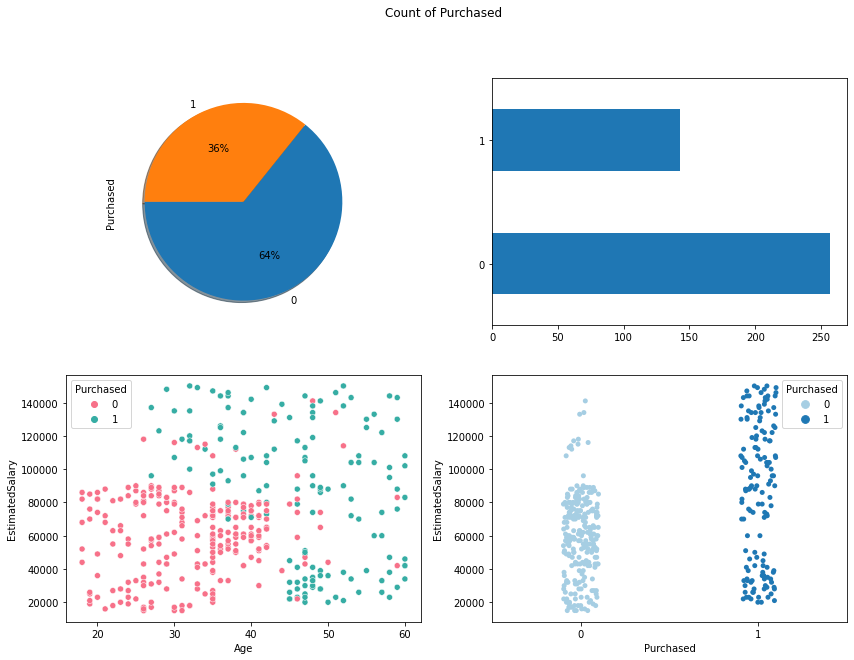

In [26]:
plot_categorial("Purchased")

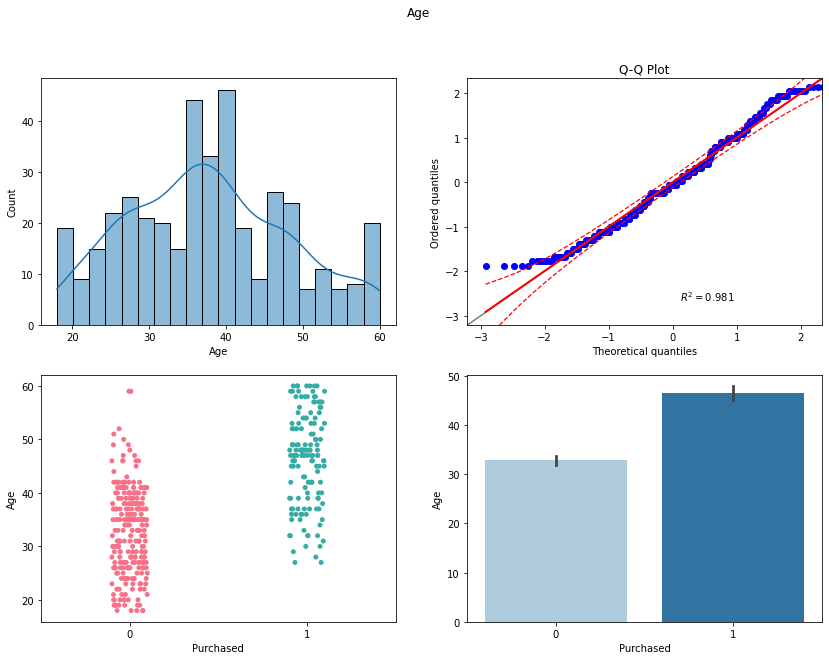

In [27]:
plot_numerical("Age")

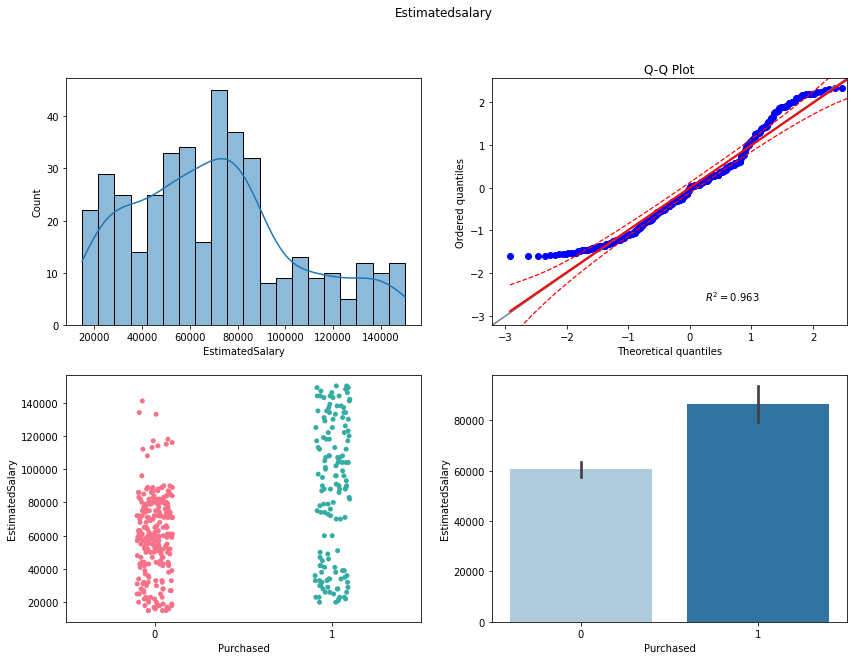

In [28]:
plot_numerical("EstimatedSalary")

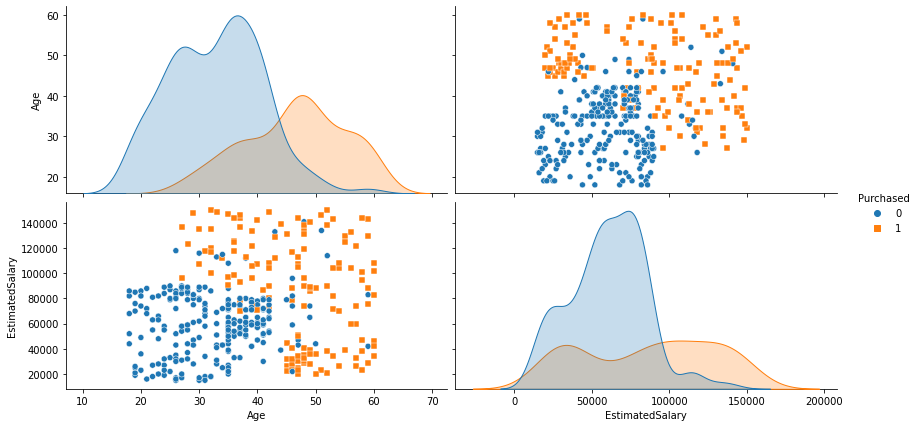

In [29]:
sns.pairplot(
    df.drop("Gender", axis=1),
    hue="Purchased",
    size=3,
    markers=["o", "s"],
    height=10,
    aspect=10 / 5,
)
plt.show()

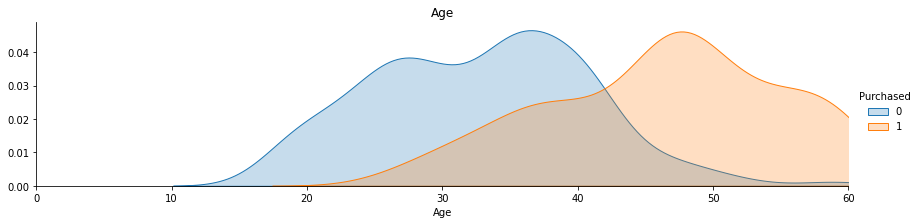

In [30]:
plot_kde("Age")

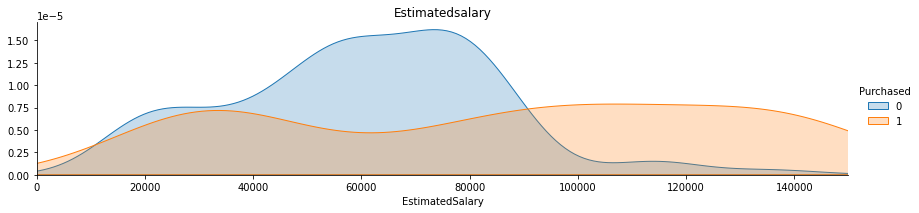

In [31]:
plot_kde("EstimatedSalary")

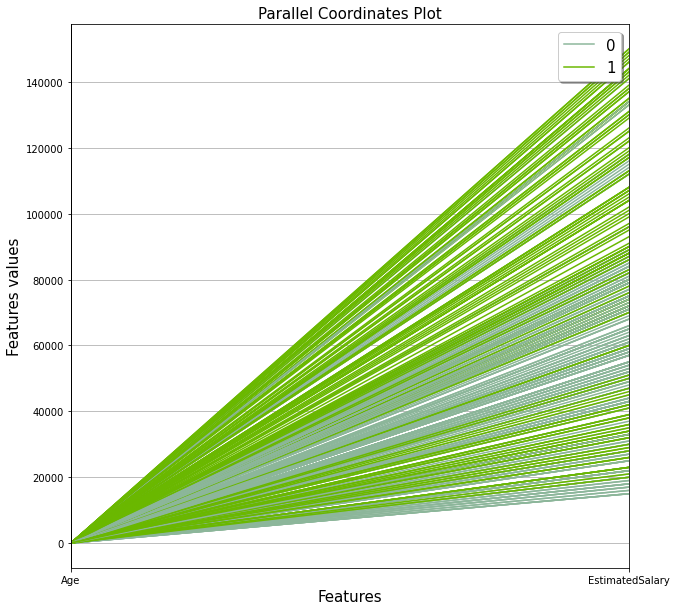

In [32]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10, 10))
parallel_coordinates(df.drop("Gender", axis=1), "Purchased")
plt.title("Parallel Coordinates Plot", fontsize=15)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Features values", fontsize=15)
plt.legend(loc=1, prop={"size": 15}, frameon=True, shadow=True)
plt.show()

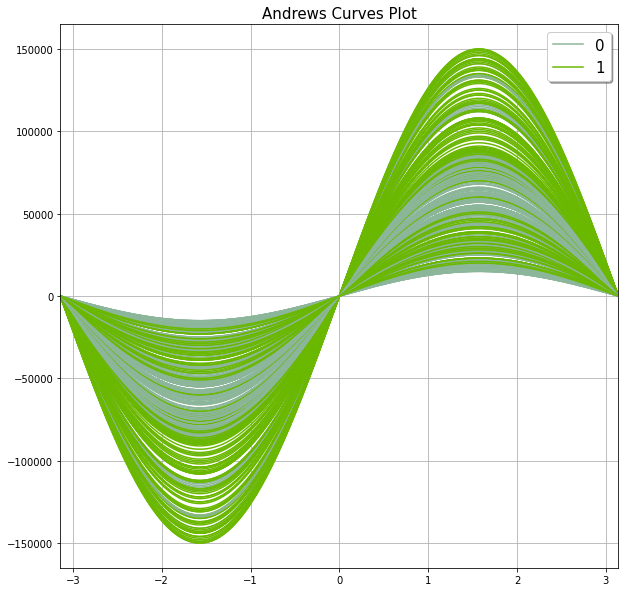

In [33]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(10, 10))
andrews_curves(df.drop("Gender", axis=1), "Purchased")
plt.title("Andrews Curves Plot", fontsize=15)
plt.legend(loc=1, prop={"size": 15}, frameon=True, shadow=True)
plt.show()

In [87]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                  2.00
Gender               1.00
BMI                  0.35
SBP                  0.00
DBP                  0.00
Cholesterol_level    0.00
Glucose_level        0.00
Smoker               0.00
Alcohol_C            0.00
Exercise             0.00
Target               1.00
dtype: float64


### Data Preprocessing

In [34]:
from yellowbrick.target import (
    FeatureCorrelation,
    BalancedBinningReference,
    ClassBalance,
)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [35]:
df.Gender = label_encoder.fit_transform(df.Gender)

In [36]:
label_encoder.classes_

array(['Female', 'Male'], dtype=object)

In [37]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [38]:
df.corrwith(df.Purchased).sort_values()

Gender            -0.042469
EstimatedSalary    0.362083
Age                0.622454
Purchased          1.000000
dtype: float64

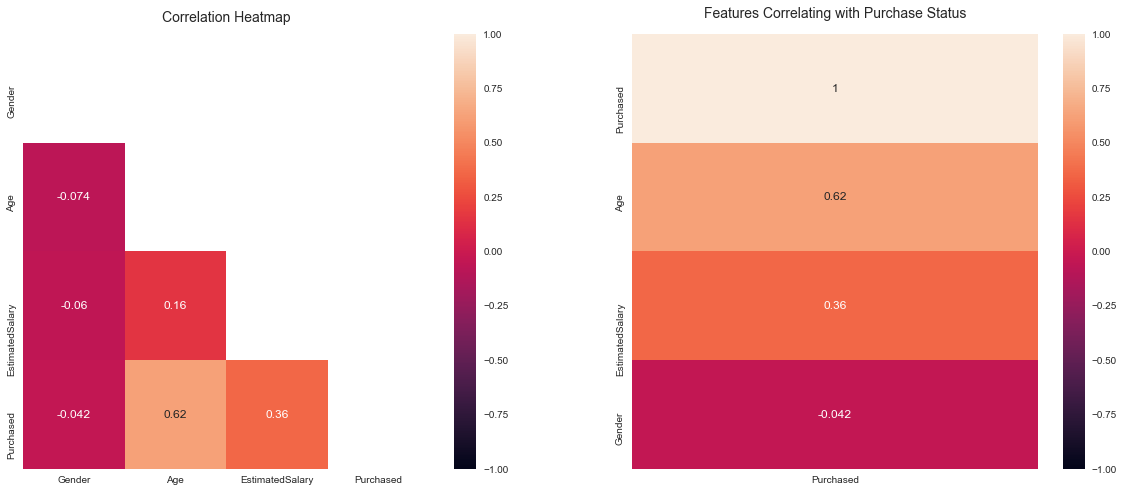

In [39]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0])
cat_heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 14}, pad=12)

heatmap = sns.heatmap(
    resign_corr[["Purchased"]].sort_values(by="Purchased", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
)
heatmap.set_title(
    "Features Correlating with Purchase Status", fontdict={"fontsize": 14}, pad=16
)
plt.show()

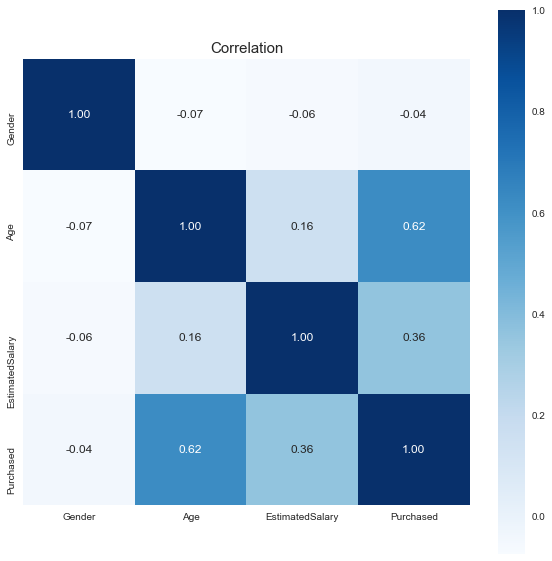

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", square=True, cmap="Blues")
plt.title("Correlation", size=15)
plt.show()

### Dataset splitting

In [41]:
X = df.drop(["Purchased"], axis=1)
y = df["Purchased"]

In [42]:
X[:5]

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [43]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

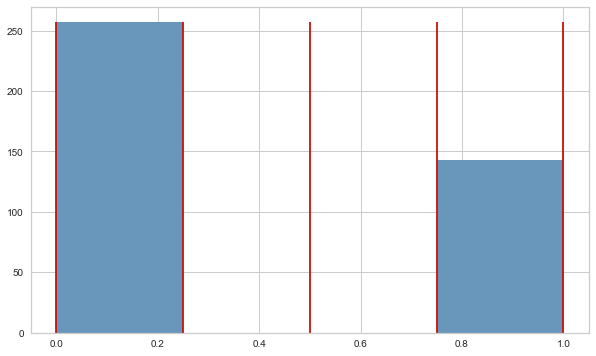

In [44]:
plt.figure(figsize=(10, 6))
visualizer = BalancedBinningReference()
visualizer.fit(y)
plt.show()

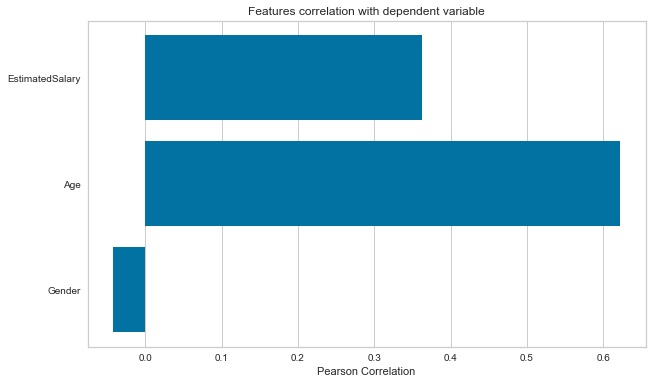

In [45]:
plt.figure(figsize=(10, 6))
visualizer = FeatureCorrelation(method="pearson")
visualizer.fit(X, y)
visualizer.show()
plt.show()

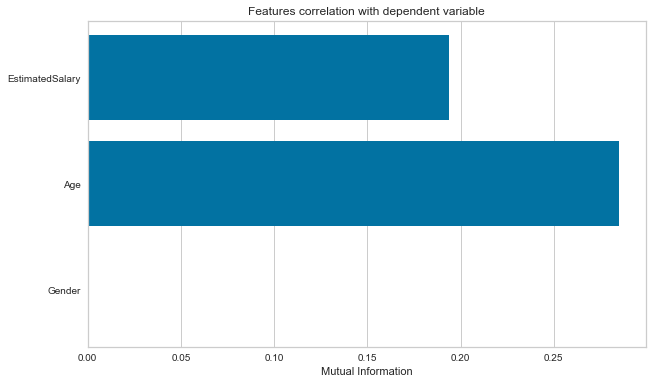

In [46]:
plt.figure(figsize=(10, 6))
visualizer = FeatureCorrelation(method="mutual_info-classification")
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X.drop("Gender", axis=1, inplace=True)
X = scaler.fit_transform(X)
print(X[:5])

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]]


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
X_train[:5]

array([[-1.01769239, -0.37418169],
       [ 0.79705706, -1.22576253],
       [ 0.12846516,  1.88691227],
       [ 0.60603081, -0.9027491 ],
       [ 1.84770149, -1.28449224]])

In [50]:
X_test[:5]

array([[ 0.79705706, -1.40195167],
       [ 2.03872775,  0.53612887],
       [-0.92217926, -0.75592482],
       [ 0.98808332,  0.77104772],
       [-0.82666613, -1.22576253]])

In [51]:
y_train[:5]

3      0
18     1
202    1
250    0
274    1
Name: Purchased, dtype: int64

In [52]:
y_test[:5]

209    0
280    1
33     0
210    1
93     0
Name: Purchased, dtype: int64

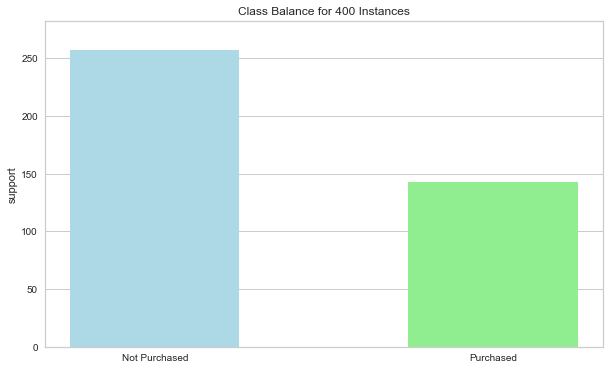

In [53]:
classes = ["Not Purchased", "Purchased"]
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

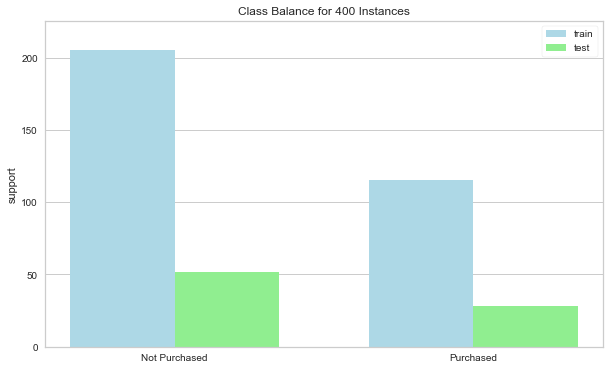

In [54]:
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y_train, y_test)
viz.show()
plt.show()

### KNN Classifier

In [55]:
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import class_prediction_error
from mlxtend.plotting import plot_decision_regions

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)

In [57]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [58]:
y_pred = knn_clf.predict(X_test)

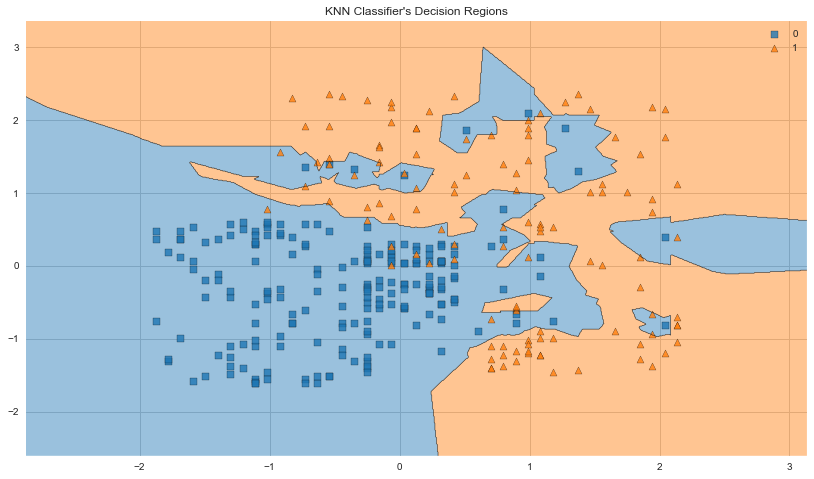

In [59]:
plt.figure(figsize=(14, 8))
plot_decision_regions(X_train, y_train.to_numpy(), clf=knn_clf, legend=True)
plt.title("KNN Classifier's Decision Regions", fontsize=12)
plt.show()

**Classification Accuracy:**

In [60]:
print(accuracy_score(y_test, y_pred))

0.8625


**Classification Error:**

In [61]:
print(1 - accuracy_score(y_test, y_pred))

0.13749999999999996


**Sensitivity/True Positive Rate/Recall Score**

In [62]:
print(recall_score(y_test, y_pred))

0.6428571428571429


**Precision Score:**

In [63]:
print(precision_score(y_test, y_pred))

0.9473684210526315


**F1 Score**

In [64]:
print(f1_score(y_test, y_pred))

0.7659574468085106


**Class Prediction Error**

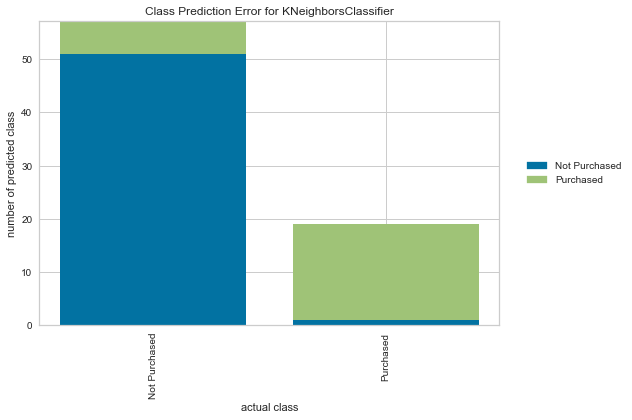

In [65]:
plt.figure(figsize=(10, 6))
visualizer = class_prediction_error(
    knn_clf, X_train, y_train, X_test, y_test, classes=classes
)
visualizer.show()
plt.show()

**ROC Curve**

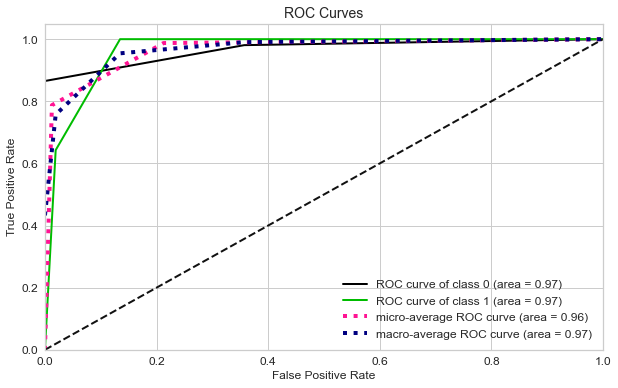

In [66]:
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Precision Recall Curve**

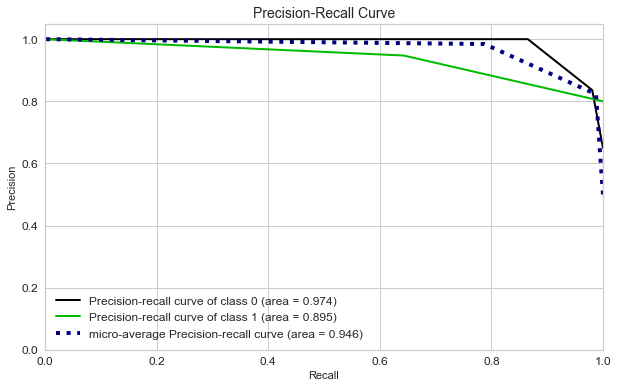

In [67]:
skplt.metrics.plot_precision_recall(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Learning Curve**

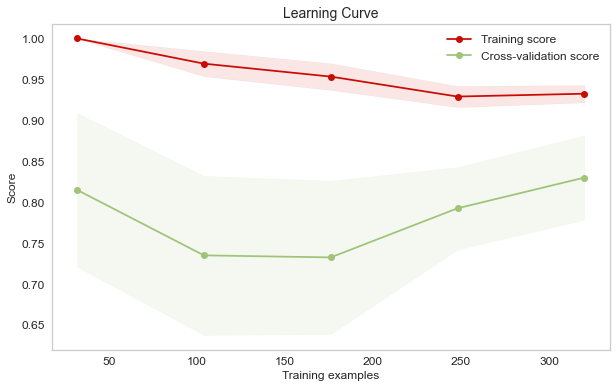

In [68]:
skplt.estimators.plot_learning_curve(
    knn_clf, X, y, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Lift Curve**

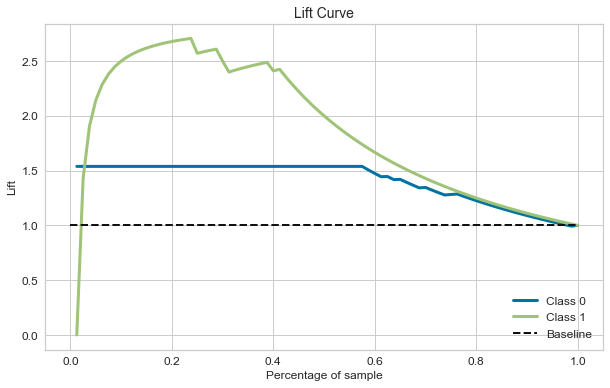

In [69]:
skplt.metrics.plot_lift_curve(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Cumulative Gains Curve**

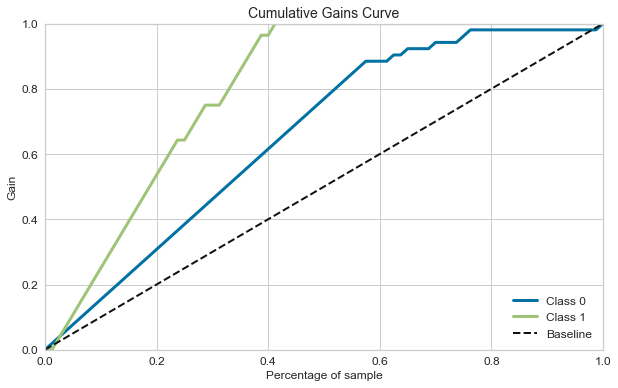

In [70]:
skplt.metrics.plot_cumulative_gain(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Confusion Matrix**

In [71]:
confusion_matrix(y_test, y_pred)

array([[51,  1],
       [10, 18]], dtype=int64)

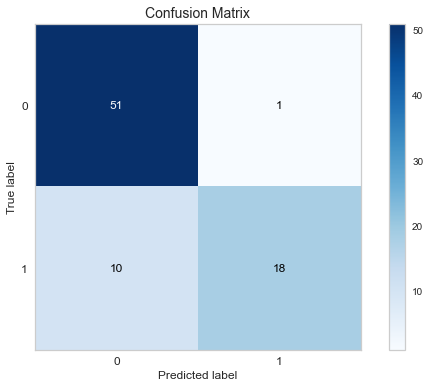

In [72]:
skplt.metrics.plot_confusion_matrix(
    y_test, y_pred, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        52
           1       0.95      0.64      0.77        28

    accuracy                           0.86        80
   macro avg       0.89      0.81      0.83        80
weighted avg       0.88      0.86      0.85        80



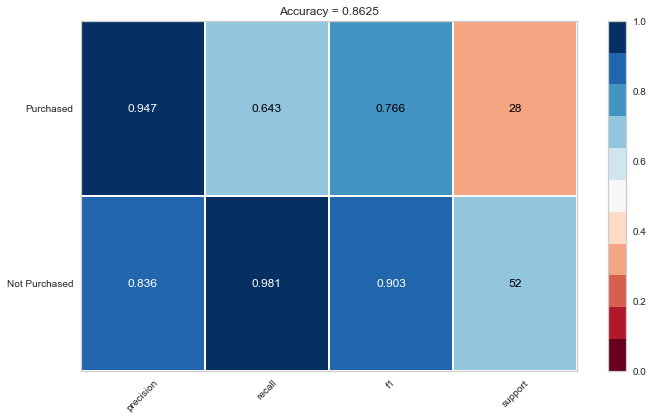

In [74]:
import yellowbrick as yb

plt.figure(figsize=(10, 6))
visualizer = yb.classifier.classification_report(
    knn_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    cmap="RdBu",
    title="Accuracy = " + str(accuracy_score(y_test, y_pred)),
)
plt.show()